In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/depression and anxiety dataset.csv')

# View the first few rows
print(data.head())


   Gender Age Number of siblings  Father's occupation  \
0  Female  23                3-4   non-govt. employee   
1  Female  23                3-4               farmer   
2  Female  22                3-4  government employee   
3    Male  23                1-2               farmer   
4    Male  23                1-2  government employee   

                Monthly family income Current residence     Marital status  \
0    middle class (10,000-20,000 BDT)              hall             single   
1    low class (less than 10,000 BDT)              hall             single   
2  upper class (more than 20,000 BDT)            family             single   
3    middle class (10,000-20,000 BDT)              hall  in a relationship   
4  upper class (more than 20,000 BDT)              mess             single   

  satisfiction with education  \
0                          no   
1                          no   
2                          no   
3                          no   
4                      

In [ ]:
# Apply one-hot encoding to the categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

print("\nData after One-Hot Encoding:")
print(data_encoded)



Data after One-Hot Encoding:
     Gender_Male  Age_19  Age_20  Age_21  Age_22  Age_22+  Age_23  Age_24  \
0          False   False   False   False   False    False    True   False   
1          False   False   False   False   False    False    True   False   
2          False   False   False   False    True    False   False   False   
3           True   False   False   False   False    False    True   False   
4           True   False   False   False   False    False    True   False   
..           ...     ...     ...     ...     ...      ...     ...     ...   
375        False   False   False   False   False    False    True   False   
376        False   False   False   False   False    False   False    True   
377        False   False   False   False   False    False   False    True   
378        False   False   False   False   False    False   False    True   
379        False   False   False   False   False    False   False    True   

     Age_25  Age_2q  ...  \
0     False   Fal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Apply one-hot encoding to categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data_encoded.drop('depression_Yes', axis=1)  # replace 'Depression_Yes' with your actual target column name
y = data_encoded['depression_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_model.score( X_test,y_test)

0.7894736842105263

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[61  3]
 [ 8 42]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.95      0.92        64
        True       0.93      0.84      0.88        50

    accuracy                           0.90       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114


Accuracy Score: 0.9035087719298246


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

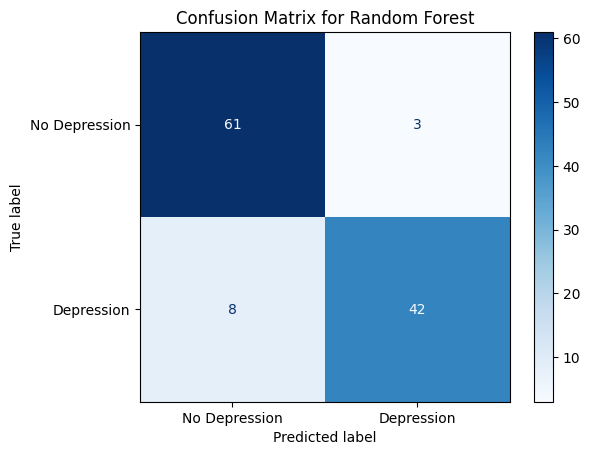

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")


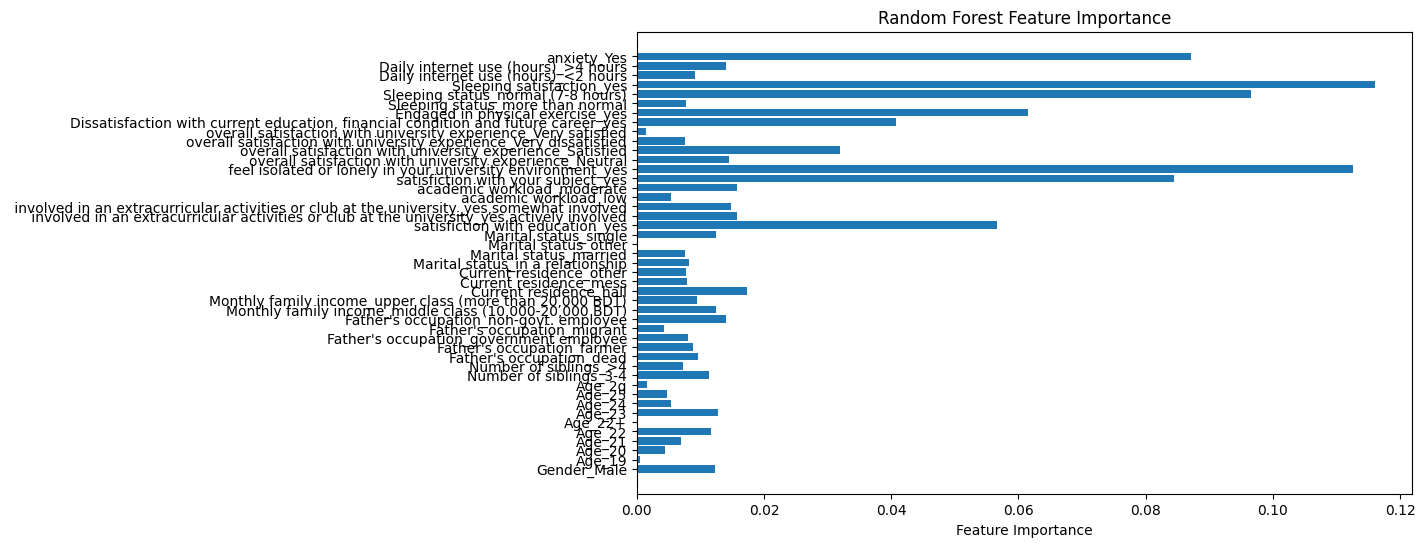

In [ ]:
# Plot feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
print(feature_importance)
# Create a DataFrame to pair features with their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(importance_df)

[0.01225256 0.00042441 0.00439591 0.00697203 0.01162617 0.00018167
 0.01268155 0.00536215 0.00474408 0.00160905 0.01135001 0.0073146
 0.00962798 0.00890431 0.00799842 0.00429835 0.01396964 0.01245759
 0.0094317  0.01730823 0.0078325  0.00767517 0.00820905 0.00753773
 0.         0.01246158 0.05660343 0.01578043 0.01486507 0.00531601
 0.01566976 0.08446774 0.11261436 0.01451221 0.03189829 0.00756983
 0.00137216 0.04074461 0.06145275 0.00771092 0.09657573 0.1160478
 0.00906928 0.01404475 0.08705842]
                                              Feature  Importance
41                          Sleeping satisfaction_yes    0.116048
32   feel isolated or lonely in your university en...    0.112614
40                 Sleeping status_normal (7-8 hours)    0.096576
44                                        anxiety_Yes    0.087058
31                 satisfiction with your subject_yes    0.084468
38                   Engaged in physical exercise_yes    0.061453
26                    satisfiction w

ANXIETY

In [ ]:
# Separate features (X) and target variable (y)
X = data_encoded.drop('anxiety_Yes', axis=1)  # replace 'anxiety_Yes' with your actual target column name
y = data_encoded['anxiety_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)
print(y_pred)

[False False False False  True False False  True False False False  True
 False False False False False False  True False False False False  True
 False False False False False False False  True False False  True  True
  True  True False False False  True False False  True False False False
 False False  True False False  True False False  True False  True False
 False  True False False False  True False False  True False False  True
  True False False False False False  True False  True False  True False
 False False False False  True False False False  True  True False False
 False False False False False False False False False False False  True
  True False False False False False]


In [ ]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[64  3]
 [21 26]]

Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.96      0.84        67
        True       0.90      0.55      0.68        47

    accuracy                           0.79       114
   macro avg       0.82      0.75      0.76       114
weighted avg       0.81      0.79      0.78       114


Accuracy Score: 0.7894736842105263


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

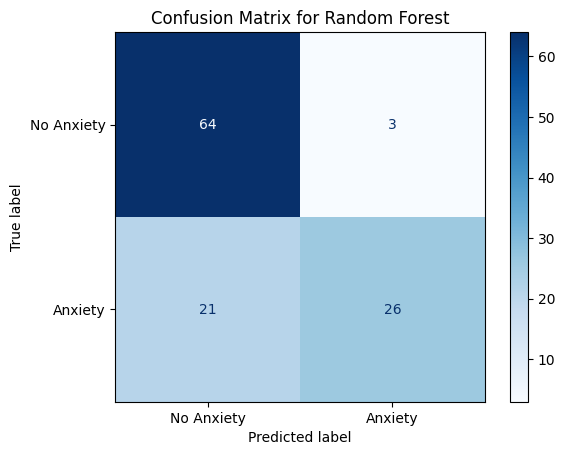

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Anxiety', 'Anxiety'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")

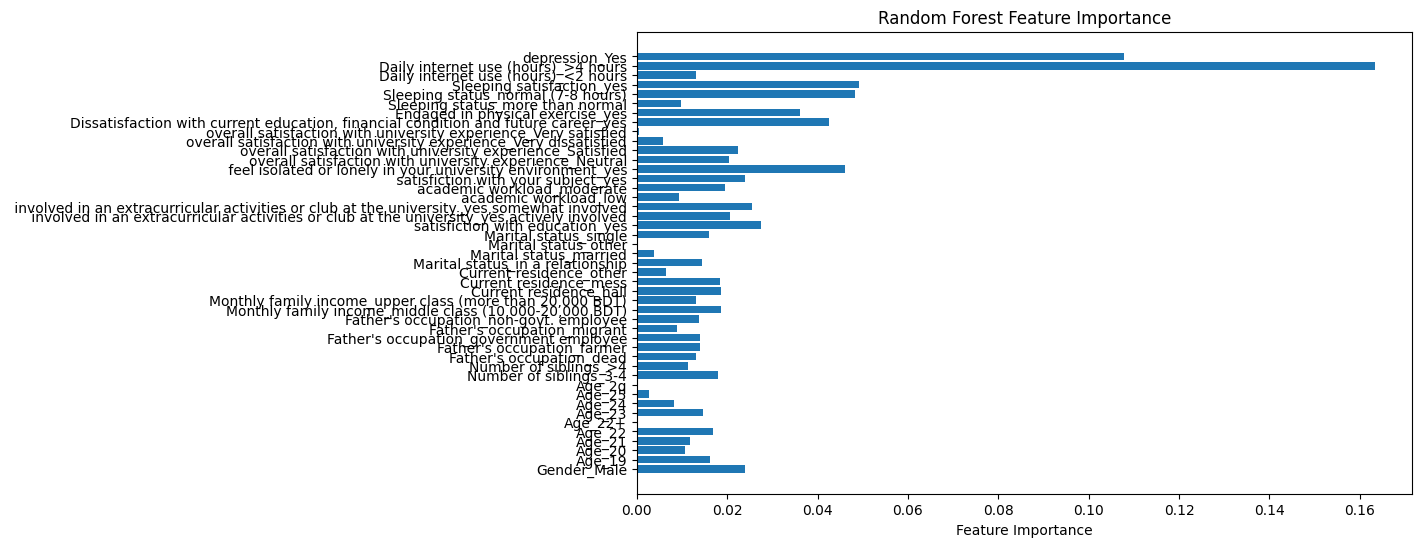

In [ ]:
# Plot feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
print(feature_importance)
# Create a DataFrame to pair features with their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(importance_df)

[0.02397349 0.01629122 0.01075308 0.01169963 0.01695655 0.00032708
 0.01461579 0.00823439 0.00279121 0.00020987 0.01790553 0.01136529
 0.01311288 0.01401189 0.01395948 0.00891267 0.01380607 0.01867284
 0.0129969  0.01867416 0.01847283 0.00645166 0.01438251 0.00374771
 0.         0.01598626 0.02746139 0.02052061 0.02554206 0.00926654
 0.01953951 0.02401231 0.04612455 0.0202871  0.0224863  0.00574671
 0.00055458 0.04242584 0.03621703 0.0098036  0.04818275 0.04927409
 0.01313863 0.16335668 0.10774876]
                                              Feature  Importance
43                Daily internet use (hours)_>4 hours    0.163357
44                                     depression_Yes    0.107749
41                          Sleeping satisfaction_yes    0.049274
40                 Sleeping status_normal (7-8 hours)    0.048183
32   feel isolated or lonely in your university en...    0.046125
37  Dissatisfaction with current education, financ...    0.042426
38                   Engaged in ph

Binary logistic regression for depression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:

# Assuming data_encoded is your DataFrame after one-hot encoding and preprocessing
# Let's say the column 'Depression_Yes' is your dependent variable
# and all other columns are your independent variables

# Define the independent variables (X) and dependent variable (y)
X = data_encoded.drop('depression_Yes', axis=1)  # Replace 'Depression_Yes' with your actual target column
y = data_encoded['depression_Yes']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling the data to have zero mean and unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the logistic regression model to the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model's performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.86      0.86        64
        True       0.82      0.82      0.82        50

    accuracy                           0.84       114
   macro avg       0.84      0.84      0.84       114
weighted avg       0.84      0.84      0.84       114

Accuracy Score: 0.8421052631578947


In [ ]:
# Display the coefficients of the logistic regression model to understand feature influence
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
})
print("\nFeature Coefficients:\n", coef_df)


Feature Coefficients:
                                               Feature  Coefficient
0                                         Gender_Male     0.155094
1                                              Age_19    -0.017291
2                                              Age_20    -0.028417
3                                              Age_21    -0.254561
4                                              Age_22    -0.387755
5                                             Age_22+    -0.167650
6                                              Age_23    -0.580697
7                                              Age_24    -0.459266
8                                              Age_25    -0.578495
9                                              Age_2q     0.350170
10                             Number of siblings_3-4     0.401223
11                              Number of siblings_>4     0.226085
12                           Father's occupation_dead    -0.051471
13                         Father's oc

Binary logistic regression for anxiety

In [ ]:
# Assuming data_encoded is your DataFrame after one-hot encoding and preprocessing
# Let's say the column 'anxiety_Yes' is  dependent variable
# and all other columns are your independent variables

# Define the independent variables (X) and dependent variable (y)
X = data_encoded.drop('anxiety_Yes', axis=1)  # Replace 'anxiety_Yes' with  actual target column
y = data_encoded['anxiety_Yes']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling the data to have zero mean and unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the logistic regression model to the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model's performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.93      0.84        67
        True       0.85      0.60      0.70        47

    accuracy                           0.79       114
   macro avg       0.81      0.76      0.77       114
weighted avg       0.80      0.79      0.78       114

Accuracy Score: 0.7894736842105263


In [ ]:
# Display the coefficients of the logistic regression model to understand feature influence
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
})
print("\nFeature Coefficients:\n", coef_df)


Feature Coefficients:
                                               Feature  Coefficient
0                                         Gender_Male    -0.745286
1                                              Age_19    -0.330405
2                                              Age_20    -0.267457
3                                              Age_21    -0.008087
4                                              Age_22     0.023553
5                                             Age_22+    -0.139555
6                                              Age_23    -0.029971
7                                              Age_24    -0.198622
8                                              Age_25    -0.168578
9                                              Age_2q     0.071205
10                             Number of siblings_3-4     0.096731
11                              Number of siblings_>4     0.239665
12                           Father's occupation_dead     0.377824
13                         Father's oc

Decision Tree for depression

Accuracy: 0.8157894736842105
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.83      0.83        64
        True       0.78      0.80      0.79        50

    accuracy                           0.82       114
   macro avg       0.81      0.81      0.81       114
weighted avg       0.82      0.82      0.82       114

Confusion Matrix:
 [[53 11]
 [10 40]]


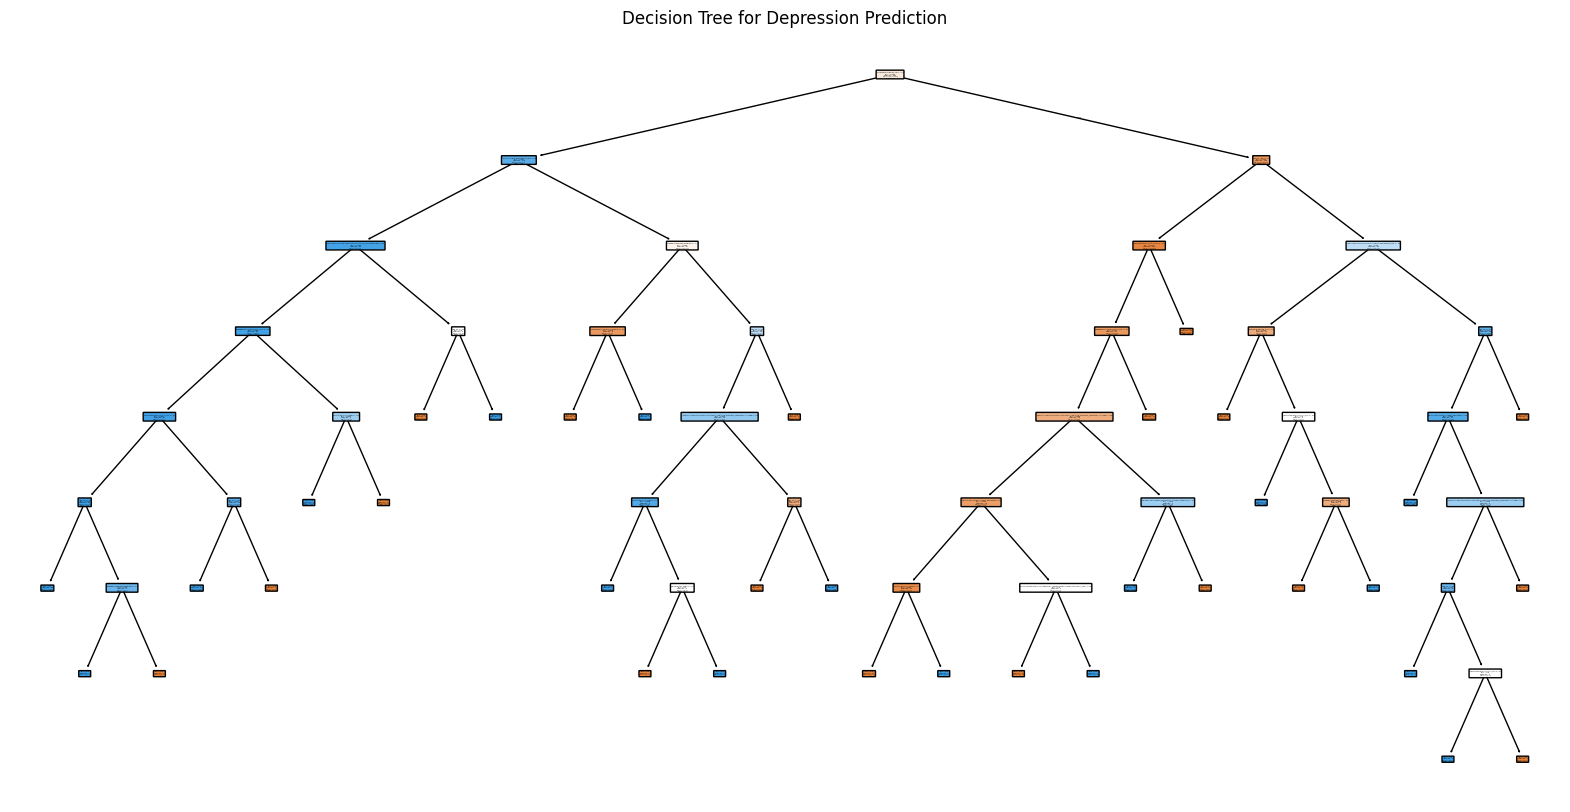

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Define the independent variables (X) and dependent variable (y)
X = data_encoded.drop('depression_Yes', axis=1)  # replace 'depression_Yes' with your actual target column
y = data_encoded['depression_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree for Depression Prediction")
plt.show()


Decision tree for anxiety

In [ ]:

# Define the independent variables (X) and dependent variable (y)
X = data_encoded.drop('anxiety_Yes', axis=1)  # replace 'anxiety_Yes' with your actual target column
y = data_encoded['depression_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        64
        True       1.00      1.00      1.00        50

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix:
 [[64  0]
 [ 0 50]]
